In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import sklearn
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/Applications/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_modelo_inicio = pd.read_pickle("df_alunos_escolas_modelo_pickle")

In [21]:
len(df_modelo_inicio)

1376414

In [4]:
list(df_modelo_inicio)

['NU_INSCRICAO',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_ST_CONCLUSAO',
 'TP_ENSINO',
 'CO_MUNICIPIO_RESIDENCIA',
 'CO_MUNICIPIO_ESC',
 'SG_UF_ESC_x',
 'TP_DEPENDENCIA_ADM_ESC_x',
 'TP_LOCALIZACAO_ESC_x',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'CO_MUNICIPIO_PROVA',
 'Q001',
 'Q002',
 'Q003',
 'Q004',
 'Q005',
 'Q007',
 'Q008',
 'Q009',
 'Q010',
 'Q011',
 'Q012',
 'Q013',
 'Q014',
 'Q015',
 'Q016',
 'Q017',
 'Q018',
 'Q019',
 'Q020',
 'Q021',
 'Q022',
 'Q023',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q028',
 'Q029',
 'Q030',
 'Q031',
 'Q032',
 'Q033',
 'Q034',
 'Q035',
 'Q036',
 'Q037',
 'Q038',
 'Q039',
 'Q040',
 'Q041',
 'Q042',
 'Q043',
 'Q044',
 'Q045',
 'Q046',
 'Q047',
 'Q048',
 'Q049',
 'Q050\n',
 'faixa_renda',
 'renda_per_capita',
 '

In [5]:
df_modelo_trabalhado = df_modelo_inicio

#### 0. Eliminando valores em branco

In [6]:
df_modelo_trabalhado = df_modelo_trabalhado[df_modelo_trabalhado['NU_IDADE'] != ''].reset_index()

In [22]:
len(df_modelo_trabalhado)

1376382

#### 1. Transformação de variáveis

In [10]:
# Criando variáveis derivadas de municípios
df_modelo_trabalhado['in_mun_res_mesmo_esc'] = (df_modelo_trabalhado['CO_MUNICIPIO_RESIDENCIA'] == df_modelo_trabalhado['CO_MUNICIPIO_ESC'])*1
df_modelo_trabalhado['in_mun_esc_mesmo_prv'] = (df_modelo_trabalhado['CO_MUNICIPIO_ESC'] == df_modelo_trabalhado['CO_MUNICIPIO_PROVA'])*1
#['a','b','c'] == ['a','d','c']

In [11]:
# Criando categorias em variáveis numéricas
def cat_idade(x):
    if int(x) < 18:
        y = 'menor_que_18'
    elif int(x) < 20:
        y = '18_19'
    else:
        y = 'maior_que_19'
    return y
df_modelo_trabalhado['categoria_idade'] = df_modelo_trabalhado['NU_IDADE'].map(cat_idade)

In [12]:
# Criando categorias em variáveis numéricas
def cat_Q005(x):
    if int(x) < 4:
        y = 'ate_3'
    elif int(x) < 6:
        y = '3_a_5'
    else:
        y = 'maior_que_5'
    return y
df_modelo_trabalhado['categoria_num_pessoas_domicilio'] = df_modelo_trabalhado['Q005'].map(cat_Q005)

In [13]:
# Criando categorias em outras variáveis
def cat_motivo(x):
    if x == '5':
        y = 1
    else:
        y = 0
    return y
df_modelo_trabalhado['ind_motivo_testar'] = df_modelo_trabalhado['Q034'].map(cat_motivo)
df_modelo_trabalhado['ind_motivo_ingressar_es_publico'] = df_modelo_trabalhado['Q035'].map(cat_motivo)
df_modelo_trabalhado['ind_motivo_ingressar_es_privado'] = df_modelo_trabalhado['Q036'].map(cat_motivo)
df_modelo_trabalhado['ind_motivo_bolsa_prouni'] = df_modelo_trabalhado['Q037'].map(cat_motivo)
df_modelo_trabalhado['ind_motivo_bolsa_fies'] = df_modelo_trabalhado['Q038'].map(cat_motivo)
df_modelo_trabalhado['ind_motivo_CSF'] = df_modelo_trabalhado['Q039'].map(cat_motivo)
df_modelo_trabalhado['ind_motivo_emprego'] = df_modelo_trabalhado['Q040'].map(cat_motivo)
df_modelo_trabalhado['ind_motivo_promocao'] = df_modelo_trabalhado['Q041'].map(cat_motivo)

In [14]:
# Binarizando categóricas
lista_binarizar = ['categoria_idade', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'SG_UF_ESC_x', 'TP_DEPENDENCIA_ADM_ESC_x', 'TP_LOCALIZACAO_ESC_x', 'Q001', 'Q002', 'Q003', 'Q004', 'categoria_num_pessoas_domicilio', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049', 'Q050\n', 'renda_per_capita_media_classe_quartil', 'in_qualif_docente_media_classe_quartil', 'NU_COMP_ALUNO_por_aluno_classe_quartil', 'NU_EQUIP_MULTIMIDIA_por_aluno_classe_quartil', 'NU_FUNCIONARIOS_por_aluno_classe_quartil', 'percentual_de_salas_utilizadas_classe_quartil', 'num_alunos_por_SALA_classe_quartil', 'faixa_valor_IEE']
#lista_binarizar = ['renda_per_capita_media_classe_quartil']

for i in lista_binarizar:
    lista_colunas = list(set(df_modelo_trabalhado[i]))
    for j in lista_colunas:
        valor_nova_coluna = j
        nome_nova_coluna = i + '_' + str(valor_nova_coluna)
        def binariza(x):
                if x == valor_nova_coluna:
                    y = 1
                else:
                    y = 0
                return y
        df_modelo_trabalhado[nome_nova_coluna] = df_modelo_trabalhado[i].map(binariza)
    print(i)

categoria_idade
TP_SEXO
TP_ESTADO_CIVIL
TP_COR_RACA
TP_ST_CONCLUSAO
SG_UF_ESC_x
TP_DEPENDENCIA_ADM_ESC_x
TP_LOCALIZACAO_ESC_x
Q001
Q002
Q003
Q004
categoria_num_pessoas_domicilio
Q007
Q008
Q009
Q010
Q011
Q012
Q013
Q014
Q015
Q016
Q017
Q018
Q019
Q020
Q021
Q022
Q023
Q024
Q025
Q026
Q042
Q043
Q044
Q045
Q046
Q047
Q048
Q049
Q050

renda_per_capita_media_classe_quartil
in_qualif_docente_media_classe_quartil
NU_COMP_ALUNO_por_aluno_classe_quartil
NU_EQUIP_MULTIMIDIA_por_aluno_classe_quartil
NU_FUNCIONARIOS_por_aluno_classe_quartil
percentual_de_salas_utilizadas_classe_quartil
num_alunos_por_SALA_classe_quartil
faixa_valor_IEE


In [15]:
df_modelo_trabalhado['label'] = (df_modelo_trabalhado['media_geral_aluno'] >= 5.616200e+02)*1

In [26]:
list(df_modelo_trabalhado)

['index',
 'NU_INSCRICAO',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_ST_CONCLUSAO',
 'TP_ENSINO',
 'CO_MUNICIPIO_RESIDENCIA',
 'CO_MUNICIPIO_ESC',
 'SG_UF_ESC_x',
 'TP_DEPENDENCIA_ADM_ESC_x',
 'TP_LOCALIZACAO_ESC_x',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'CO_MUNICIPIO_PROVA',
 'Q001',
 'Q002',
 'Q003',
 'Q004',
 'Q005',
 'Q007',
 'Q008',
 'Q009',
 'Q010',
 'Q011',
 'Q012',
 'Q013',
 'Q014',
 'Q015',
 'Q016',
 'Q017',
 'Q018',
 'Q019',
 'Q020',
 'Q021',
 'Q022',
 'Q023',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q028',
 'Q029',
 'Q030',
 'Q031',
 'Q032',
 'Q033',
 'Q034',
 'Q035',
 'Q036',
 'Q037',
 'Q038',
 'Q039',
 'Q040',
 'Q041',
 'Q042',
 'Q043',
 'Q044',
 'Q045',
 'Q046',
 'Q047',
 'Q048',
 'Q049',
 'Q050\n',
 'faixa_renda',
 'renda_per_c

In [17]:
df_modelo_trabalhado['media_geral_aluno'].describe()

count    1.376382e+06
mean     5.114743e+02
std      8.826821e+01
min      0.000000e+00
25%      4.608800e+02
50%      5.051000e+02
75%      5.616200e+02
max      8.546000e+02
Name: media_geral_aluno, dtype: float64

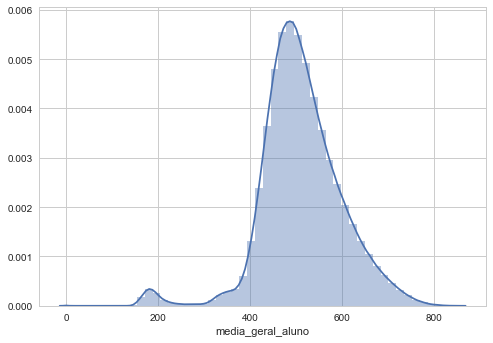

In [25]:
sns.distplot(df_modelo_trabalhado['media_geral_aluno'])

#### 2. Modelo de Random Forest - base completa - dependente nota

In [27]:
X = df_modelo_trabalhado[[k for k in list(df_modelo_trabalhado) if k not in ['index',
 'NU_INSCRICAO',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_ST_CONCLUSAO',
 'TP_ENSINO',
 'CO_MUNICIPIO_RESIDENCIA',
 'CO_MUNICIPIO_ESC',
 'SG_UF_ESC_x',
 'TP_DEPENDENCIA_ADM_ESC_x',
 'TP_LOCALIZACAO_ESC_x','CO_MUNICIPIO_PROVA','Q001',
 'Q002',
 'Q003',
 'Q004',
 'Q005',
 'Q007',
 'Q008',
 'Q009',
 'Q010',
 'Q011',
 'Q012',
 'Q013',
 'Q014',
 'Q015',
 'Q016',
 'Q017',
 'Q018',
 'Q019',
 'Q020',
 'Q021',
 'Q022',
 'Q023',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q028',
 'Q029',
 'Q030',
 'Q031',
 'Q032',
 'Q033',
 'Q034',
 'Q035',
 'Q036',
 'Q037',
 'Q038',
 'Q039',
 'Q040',
 'Q041',
 'Q042',
 'Q043',
 'Q044',
 'Q045',
 'Q046',
 'Q047',
 'Q048',
 'Q049',
 'Q050\n','faixa_renda','renda_per_capita','renda_per_capita_media_classe_quartil',
 'in_qualif_docente_media_classe_quartil',
 'NU_COMP_ALUNO_por_aluno_classe_quartil',
 'NU_EQUIP_MULTIMIDIA_por_aluno_classe_quartil',
 'NU_FUNCIONARIOS_por_aluno_classe_quartil',
 'percentual_de_salas_utilizadas_classe_quartil',
 'num_alunos_por_SALA_classe_quartil',
 'faixa_valor_IEE','dummy_600',
 'media_geral_aluno',
 'categoria_idade',
 'categoria_num_pessoas_domicilio','TP_ESTADO_CIVIL_','label']]]
y = df_modelo_trabalhado['media_geral_aluno']
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [28]:
# Use numpy to convert to arrays
# Labels are the values we want to predict
labels = np.array(y)
# Saving feature names for later use
feature_list = list(X.columns)
# Convert to numpy array
features = np.array(X)

In [29]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.1, random_state = 42)

In [30]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1238743, 282)
Training Labels Shape: (1238743,)
Testing Features Shape: (137639, 282)
Testing Labels Shape: (137639,)


In [202]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [203]:
predictions = rf.predict(test_features)

In [221]:
errors = abs(predictions - test_labels)

In [222]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'pontos.')

Mean Absolute Error: 48.33 pontos.


In [223]:
np.corrcoef(predictions, test_labels)

array([[ 1.        ,  0.63646888],
       [ 0.63646888,  1.        ]])

In [227]:
# Calculate mean absolute percentage error (MAPE)
test_labels_100 = np.copy(test_labels)
test_labels_100[test_labels_100 == 0] = 1
mape = 100 * (errors / test_labels_100)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 85.8 %.


In [203]:
predictions_train = rf.predict(train_features)

In [221]:
errors_train = abs(predictions_train - train_labels)

In [ ]:
print('Mean Absolute Error (previsao):', round(np.mean(errors_train), 2), 'pontos.')

#### 3. Modelo normalizado (ajustei parâmetros de profundidade máxima e split mínimo)¶

In [ ]:
# Modelo normalizado
rf_small = RandomForestRegressor(n_estimators = 1000, min_samples_split = 10, max_depth = 20, random_state = 42, verbose = 1, n_jobs = -1)
# Treinando o modelo
rf_small.fit(train_features, train_labels);

In [ ]:
predictions_small = rf_small.predict(test_features)

In [ ]:
errors_small = abs(predictions_small - test_labels)

In [ ]:
print('Mean Absolute Error (no conjunto de teste):', round(np.mean(errors_small), 2), 'pontos.')

In [ ]:
# Correlação entre previsoes e notas reais
np.corrcoef(predictions_small, test_labels)

In [ ]:
# Calculando o mean absolute percentage error (MAPE)
test_labels_100 = np.copy(test_labels)
test_labels_100[test_labels_100 == 0] = 1
mape = 100 * (errors_small / test_labels_100)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
# Plotando previsoes
predictions_data = pd.DataFrame(data = {'prediction': predictions_small, 'labels': test_labels}).sort_values('labels').reset_index()
predictions_data['index'] = predictions_data.index
#predictions_data['classe'] = predictions_data['labels'].map(grupo_nota)
predictions_data['classe_menor'] = pd.cut(predictions_data['labels'], 100, labels=range(1,101))
predictions_data_group = predictions_data.groupby(['classe_menor']).agg({'labels': 'median', 'prediction': 'median'})
predictions_data_group = predictions_data_group.dropna(axis=0, how='all').reset_index()

In [ ]:
plt.plot(predictions_data_group.index, predictions_data_group['labels'], 'g', label = 'labels')
plt.plot(predictions_data_group.index, predictions_data_group['prediction'], 'ro', label = 'prediction')

In [ ]:
predictions_train_small = rf_small.predict(train_features)

In [ ]:
errors_train_small = abs(predictions_train_small - train_labels)

In [ ]:
print('Mean Absolute Error (no conjunto de treino):', round(np.mean(errors_train_small), 2), 'pontos.')

In [ ]:
np.corrcoef(predictions_train_small, train_labels)

In [ ]:
# Calculando o mean absolute percentage error (MAPE)
train_labels_100 = np.copy(train_labels)
train_labels_100[train_labels_100 == 0] = 1
mape = 100 * (errors_train_small / train_labels_100)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
# Calculando numerical feature importances
importances = list(rf_small.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]